In [41]:
#type:ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split


In [14]:
df=pd.read_csv('train.tsv',sep='\t')

In [16]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [25]:
df['Sentiment'].value_counts()/len(df['Sentiment'])


Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: count, dtype: float64

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_10424\2689743136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Sentiment'].value_counts()/len(df['Sentiment']),palette='Set2')


<Axes: xlabel='Sentiment', ylabel='count'>

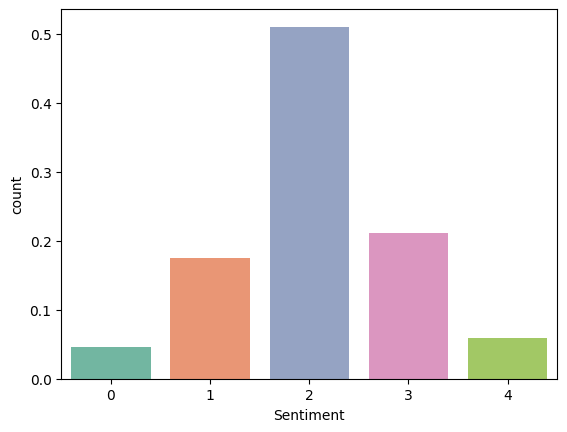

In [35]:
sns.barplot(df['Sentiment'].value_counts()/len(df['Sentiment']),palette='Set2')

In [31]:
df[df['Sentiment']==2].sample(10)

,PhraseId,SentenceId,Phrase,Sentiment
500,501,18,--,2
118979,118980,6359,suddenly wake up,2
113480,113481,6032,'ve been watching for decades,2
33051,33052,1549,find their own rhythm,2
50390,50391,2477,explosion or gunfight,2
66381,66382,3367,Who is this movie for ?,2
71486,71487,3646,infomercial for Universal Studios and its anci...,2
6391,6392,254,"Some of the computer animation is handsome , a...",2
22023,22024,988,total,2
128168,128169,6896,"broad , mildly fleshed-out characters",2


In [38]:
token=df['Phrase']

In [47]:
import os

# Specify the directory you want to use
nltk_data_dir = 'D:\project3.1\env\Lib'

# Add this directory to NLTK data path
nltk.data.path.append(nltk_data_dir)

# Download the punkt tokenizer into the specified directory
nltk.download('punkt', download_dir=nltk_data_dir)


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_10424\4182580680.py:4: SyntaxWarning: invalid escape sequence '\p'
  nltk_data_dir = 'D:\project3.1\env\Lib'
[nltk_data] Downloading package punkt to D:\project3.1\env\Lib...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [49]:
nltk.download('punkt_tab', download_dir=nltk_data_dir)


[nltk_data] Downloading package punkt_tab to D:\project3.1\env\Lib...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [51]:
tokens=[word_tokenize(word) for word in token ]

In [56]:
tokens

[['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  ',',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amounts',
  'to',
  'much',
  'of',
  'a',
  'story',
  '.'],
 ['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['A', 'series'],
 ['A'],
 ['series'],
 ['of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapades'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'